In [3]:
import tensorflow
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

model = tensorflow.keras.models.load_model(r"C:\MyProject\397199_397209\Models\BunuSil_model.h5")
#model yükleniyor.

train_path = r'C:\MyProject\397199_397209\Data\ThreeClassDataBase\Train'
validation_path = r'C:\MyProject\397199_397209\Data\ThreeClassDataBase\Validation'
test_path = r'C:\MyProject\397199_397209\Data\ThreeClassDataBase\Test'

train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator( #önişleme kısmı burası
      rescale=1./255, # piksel değerleri 0-255'den 0-1 arasına getiriliyor.
      rotation_range=40, # istenilen artırma işlemleri yapılabilir.
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip = False, #burası önemli, aynalama denebilir.
      #brightness_range = [0.3, 1.0],
      fill_mode='nearest'
      )

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=16, #aynı anda kaç adet verinin işleneceğidir. Aynı anda 16 verinin hatası hesaplanır. veriler 16'şar 16'şar eğitilir.
        #düşük olması demek, fazla optimizasyon hesaplaması anlamına gelir. Eğitim süresi daha uzun olur.
        )

# To validate the training process, we do not need augmented images.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=16,
        )

class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, acc_limit,val_limit):
        super(MyThresholdCallback, self).__init__()
        self.acc_limit = acc_limit
        self.val_limit = val_limit
    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["acc"]
        val_acc = logs["val_acc"]
        if val_acc >= self.val_limit :
            if acc >= self.acc_limit :
                self.model.stop_training = True

callbacks = MyThresholdCallback(acc_limit=0.1, val_limit=0.1)

history = model.fit( #eğitim takibi
      train_generator,
      steps_per_epoch=15, #
      epochs = 30,
      validation_data=validation_generator,
      validation_steps=1,
      callbacks=[callbacks]
      )


Found 1242 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Epoch 1/30
15/15 [==============================] - 29s 2s/step - loss: 0.6144 - acc: 0.4316 - val_loss: 0.5428 - val_acc: 0.6875


In [15]:
model.save(r'C:\MyProject\397199_397209\Models\ThreeClassModel633_model.h5')

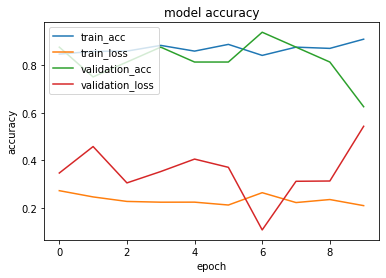

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'train_loss', 'validation_acc', 'validation_loss'], loc='upper left')
plt.show()

In [21]:
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
       test_path,
        target_size=(224, 224),
        batch_size=16,
        )

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('lost acc:', test_loss)


Found 276 images belonging to 3 classes.


C:\Users\cakir\AppData\Local\Temp\ipykernel_9500\3001183892.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9202898740768433
lost acc: 0.18305565416812897
